# Ring-shaped distributions
K-Means tends to create circular clusters and brings the samples together inside. However, there are distributions which could not be classified correctly using this idea.

In [4]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

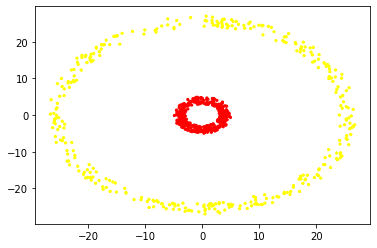

In [8]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

# K-Means Algorithm

In [9]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans(2).fit(data)

c:\Users\Alanr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
clust = km.predict(data)

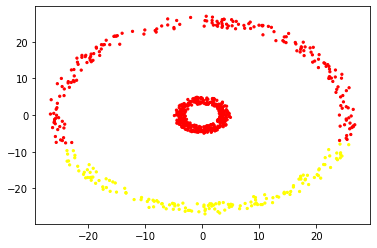

In [13]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")

At first glance we can see that the classification with this type of distributions is not correct. The algorithm is unable to satisfy two natural clusters based on concentric rings; There are points that are both the same distance from the inner and outer ring.

The problem is that it is based on using metrics such as the Euclidean or Manhattan distance, which produce objects that are convex (any points inside the objects always remain inside the object).


# K-Medoids

It consists of selecting k initial points within the initial cluster set. For each of the points in the data set, the center of the closest cluster will be calculated with any type of metric and the difference is that the center of the cluster will not be assigned to the barycenter of those points but will be assigned to said point in question. For each cluster point the cluster center will be swapped with the point and the reduction in the total distances with respect to the cluster center across all members is calculated using cswap, if it does not improve, it is not chosen. It is iterated for all the points of the dataset and we will always keep one of the points (medoid) as the center.

For example, we start from 2 centers (2 clusters) and they always move to end up selecting the one that ends up being closest in the middle. It has the advantage that the optimal criterion does not require an optimization function, but is based on the compactness term (how compact the points are), being more flexible than a distance (metric).


In [17]:
from pyclust import KMedoids

In [19]:
kmed = KMedoids(2).fit_predict(data)

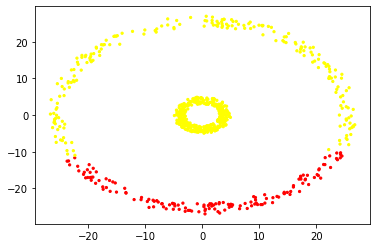

In [20]:
plt.scatter(data[:,0], data[:,1], c = kmed, s = 5, cmap = "autumn")

Using KMedoids we see that it has not improved. The clustering algorithm must be changed. Perhaps instead of looking for similarity between the points in a single stage, we would have to do a linear transformation or perhaps opt for a way of generating clustering that does not care too much about the fact that they are distributed in a circular way (distance does not matter). so much importance).

Linear transformations are usually used and the values and eigenvectors of the dataset are usually searched (directions where the data fits best). It is a widely used technique when working with unstructured data such as images.

# Spectral Clustering Algorithm

It is based on generating the global matrix of values and eigenvectors after carrying out a transformation of the original data. Transform the original data
making $e^{-\gamma*\textit{Distance matrix}^2}$ for each pair of points and ends up constructing a Laplacian matrix from which the eigenvalues are searched, thus allowing spectral clustering to be done.

In [21]:
from sklearn.cluster import SpectralClustering

In [22]:
clust = SpectralClustering(2).fit_predict(data)

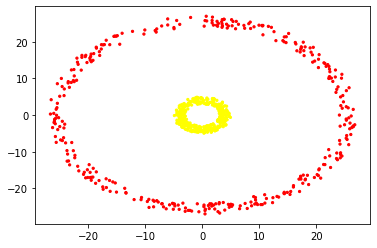

In [23]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap="autumn")

Here we can see that the points have been correctly classified.

Way to use clustering tools:
* Can I estimate the value of k?
    * No: Affinity Propagation
    * Yes: Can I rely on Euclidean distance to work?
        * Yes: KMeans
        * No: Can we base ourselves on looking for the values that are more in the middle?
            * Yes: KMediods
            * No: Linearly separable data?
                * Yes: Agglomerative clustering
                * NO: Spectral clustering (non-linearly separable)